In [359]:
pip install opencv-python matplotlib tensorflow

Note: you may need to restart the kernel to use updated packages.


In [360]:
pip list

Package                 Version
----------------------- -----------
absl-py                 2.2.2
aiohappyeyeballs        2.6.1
aiohttp                 3.11.16
aiosignal               1.3.2
alembic                 1.14.0
asttokens               3.0.0
astunparse              1.6.3
attrs                   25.3.0
beautifulsoup4          4.13.3
bleach                  6.2.0
blinker                 1.9.0
certifi                 2025.1.31
charset-normalizer      3.4.1
click                   8.1.7
colorama                0.4.6
comm                    0.2.2
contourpy               1.3.1
cycler                  0.12.1
datasets                3.5.0
debugpy                 1.8.13
decorator               5.2.1
dill                    0.3.8
executing               2.2.0
filelock                3.17.0
Flask                   3.1.0
Flask-Migrate           4.0.7
Flask-SQLAlchemy        3.1.1
flatbuffers             25.2.10
fonttools               4.56.0
frozenlist              1.5.0
fsspec           

In [361]:
import tensorflow as tf
import os

In [362]:
tf.config.list_physical_devices('GPU')

[]

In [363]:
import cv2
import imghdr

In [ ]:
wildlife_dir = ''
clef_dir = ''

print(os.listdir(wildlife_dir))
print(os.listdir(clef_dir))

['AAUZebraFish', 'AerialCattle2017', 'AmvrakikosTurtles', 'ATRW', 'BelugaID', 'BirdIndividual', 'CatIndividualImages', 'Chicks4FreeID', 'citation', 'CowDataset', 'Cows2021', 'CTai', 'CZoo', 'DogFaceNet', 'FriesianCattle2015', 'FriesianCattle2017', 'Giraffes', 'GiraffeZebraID', 'HyenaID2022', 'IPanda50', 'LeopardID2022', 'MPDD', 'MultiCamCows2024', 'NDD20', 'NyalaData', 'OpenCows2020', 'PolarBearVidID', 'PrimFace', 'ReunionTurtles', 'SealID', 'SeaStarReID2023', 'SeaTurtleID2022', 'SMALST', 'SouthernProvinceTurtles', 'StripeSpotter', 'WhaleSharkID', 'ZakynthosTurtles', 'ZindiTurtleRecall']
['images', 'metadata.csv', 'sample_submission.csv']


In [365]:
img_exts = ['jpeg', 'jpg', 'png', 'bmp', 'JPG']

In [366]:
for image_class in os.listdir(wildlife_dir): 
    for image in os.listdir(os.path.join(wildlife_dir, image_class)):
        image_path = os.path.join(wildlife_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [367]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
wildlife_data = tf.keras.utils.image_dataset_from_directory(wildlife_dir)

Found 1846 files belonging to 38 classes.
Found 3903 files belonging to 2 classes.
Found 2077 files belonging to 2 classes.
Found 9229 files belonging to 2 classes.


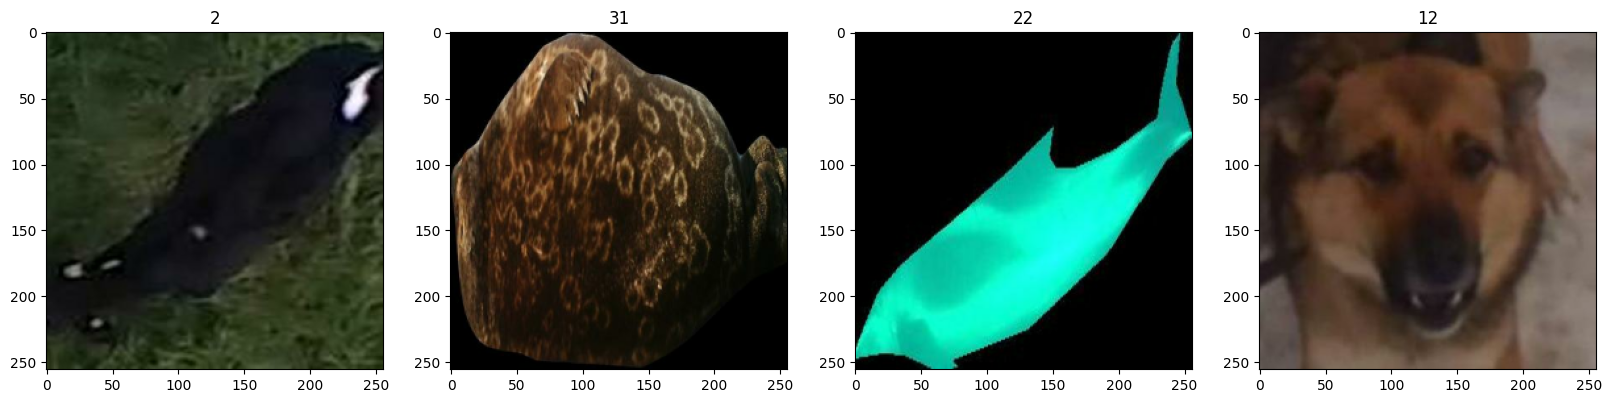

In [369]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(wildlife_batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(wildlife_batch[1][idx])

In [370]:
wildlife_data = wildlife_data.map(lambda x,y: (x/255, y))

In [371]:
scaled_wildlife_iter = wildlife_data.as_numpy_iterator()
wildlife_batch = scaled_wildlife_iter.next()
wildlife_batch = scaled_wildlife_iter.next()

In [372]:
wildlife_batch[0].min(), wildlife_batch[0].max()

(np.float32(0.0), np.float32(1.0))

In [373]:
len(wildlife_data)

58

In [374]:
train_size = int(len(wildlife_data) * 0.7)
val_size = int(len(wildlife_data) * 0.2)+1
test_size = int(len(wildlife_data) * 0.1)+1
train_size + val_size + test_size

58

In [375]:
train = wildlife_data.take(train_size)
val = wildlife_data.skip(train_size).take(val_size)
test = wildlife_data.skip(train_size + val_size).take(test_size)

In [376]:
def extract_labels(dataset):
    labels = []
    for _, label in dataset:
        labels.append(label.numpy())  # Convert to numpy array
    return np.concatenate(labels)  # Concatenate all labels into a single array

# Extract labels from the training and validation datasets


In [377]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [378]:
cnn_model = Sequential()

In [379]:
# cnn_model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# cnn_model.add(MaxPooling2D())
# cnn_model.add(Conv2D(32, (3,3), 1, activation='relu'))
# cnn_model.add(MaxPooling2D())
# cnn_model.add(Conv2D(16, (3,3), 1, activation='relu'))
# cnn_model.add(MaxPooling2D())
# cnn_model.add(Flatten())
# cnn_model.add(Dense(256, activation='relu'))
# cnn_model.add(Dense(37, activation='softmax'))

In [380]:
cnn_model = Sequential()

cnn_model.add(Conv2D(256, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
cnn_model.add(MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid'))

cnn_model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid'))

cnn_model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid'))

cnn_model.add(Flatten())
cnn_model.add(Dense(38, activation='softmax'))

c:\Users\kaila\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [381]:
cnn_model.compile('adam', loss =tf.keras.losses.SparseCategoricalCrossentropy(),
 metrics=['accuracy'])

In [382]:
cnn_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 254, 254, 256)  │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 126, 126, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 124, 124, 128)  │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 61, 61, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 59, 59, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 53824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 38)             │     2,045,350 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,421,350 (9.24 MB)

 Trainable params: 2,421,350 (9.24 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
logdir = r''

In [384]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [385]:
hist = cnn_model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback], verbose=2)

Epoch 1/20
40/40 - 211s - 5s/step - accuracy: 0.2234 - loss: 2.9848 - val_accuracy: 0.4557 - val_loss: 1.9163
Epoch 2/20
40/40 - 181s - 5s/step - accuracy: 0.6562 - loss: 1.2589 - val_accuracy: 0.6771 - val_loss: 1.1069
Epoch 3/20
40/40 - 189s - 5s/step - accuracy: 0.8234 - loss: 0.6097 - val_accuracy: 0.8047 - val_loss: 0.8132
Epoch 4/20
40/40 - 189s - 5s/step - accuracy: 0.8984 - loss: 0.3571 - val_accuracy: 0.7995 - val_loss: 0.6991
Epoch 5/20
40/40 - 187s - 5s/step - accuracy: 0.9383 - loss: 0.2202 - val_accuracy: 0.8385 - val_loss: 0.5960
Epoch 6/20
40/40 - 188s - 5s/step - accuracy: 0.9617 - loss: 0.1228 - val_accuracy: 0.8672 - val_loss: 0.5874
Epoch 7/20
40/40 - 187s - 5s/step - accuracy: 0.9711 - loss: 0.1022 - val_accuracy: 0.9010 - val_loss: 0.4066
Epoch 8/20
40/40 - 188s - 5s/step - accuracy: 0.9742 - loss: 0.0930 - val_accuracy: 0.8542 - val_loss: 0.6123
Epoch 9/20
40/40 - 188s - 5s/step - accuracy: 0.9664 - loss: 0.1431 - val_accuracy: 0.8438 - val_loss: 0.5996
Epoch 10/2

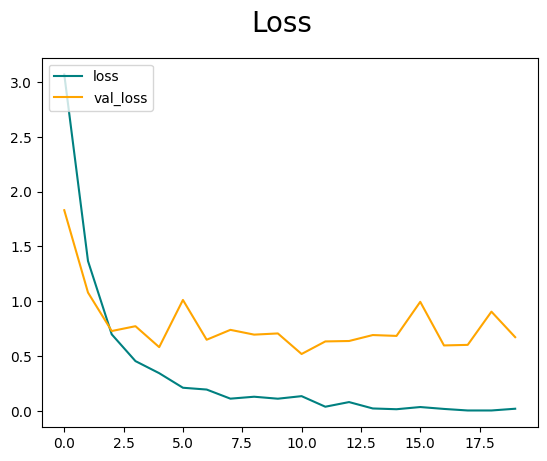

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

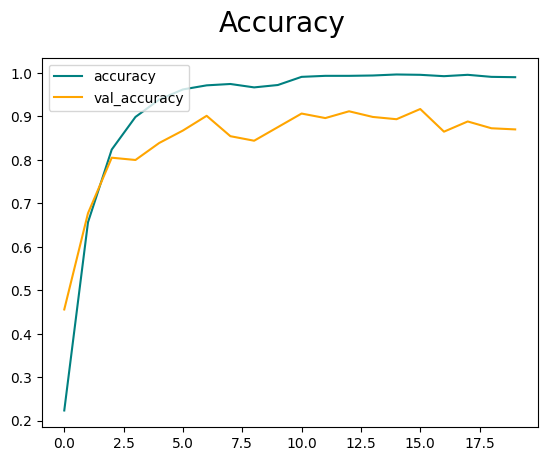

In [386]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [388]:
predictions = cnn_model.predict(test)
predicted_classes = np.argmax(predictions, axis=1)

acuracy = np.mean(predicted_classes == extract_labels(test))
print(f'Accuracy: {accuracy*100:.2f}%')

6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step
Accuracy: 4.40%


In [389]:
print(predicted_classes[:10])
print(extract_labels(test)[:10])

[20  6  5  8  3 10 15 11 35 13]
[14 12  4 21  8  7 22  7 36 29]


In [ ]:
cnn_model.save(r'')